# Problem Statement : How to Find the Rank of Professor with Class Notes quality 9.5 , Explanation quality 15 and Attendence 6.5???

### Professor Ratings based on  Class Notes,Attendence,Class Explanations

We are taking three simple rules:

1. If the Class Notes quality is worst OR the Explanations qualityis bad or Attendence is low, then the ratings will be low
2. If the Class Notes quality is good OR the Explanations quality is good and Attendence is medium, then the ratings will be Medium
3. If the Class Notes quality is very good OR the Explanations quality is very good and Attendence is high, then the ratings will be high

### Input Variables and Output Variables


Three inputs
-  Class Notes quality
-  Explanation quality
-  Attendence

Output Variable

- Rating


In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


### Import Necessary Packages

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


### Generating Universe Variables

In [3]:
#  Class Notes ,Explanations and Attendence are  ranges [0, 10]
#  Rating has a range of [0, 10] 
x_class_notes = np.arange(0, 21, 1)
x_exp = np.arange(0, 21, 1)
x_atten = np.arange(0, 21, 1)
x_ratings  = np.arange(0, 41, 1)

### Membership Functions

In [4]:
# Generate fuzzy membership functions
# class notes
class_notes_bad = fuzz.trimf(x_class_notes, abc=[0, 0, 10])
class_notes_good = fuzz.trimf(x_class_notes, abc=[0, 10, 20])
class_notes_vgood = fuzz.trimf(x_class_notes, abc=[10, 20, 20])
# explanations
exp_bad = fuzz.trimf(x_exp, abc=[0, 0, 10])
exp_good = fuzz.trimf(x_exp, abc=[0, 10, 20])
exp_vgood = fuzz.trimf(x_exp, abc=[10, 20, 20])
# Attendace
atten_lo = fuzz.trimf(x_atten, abc=[0, 0, 10])
atten_md = fuzz.trimf(x_atten, abc=[0, 10, 20])
atten_hi = fuzz.trimf(x_atten, abc=[10, 20, 20])
# Ratings
ratings_lo = fuzz.trimf(x_ratings, abc=[0, 0, 20])
ratings_md = fuzz.trimf(x_ratings, abc=[0, 20, 40])
ratings_hi = fuzz.trimf(x_ratings, abc=[20, 40, 40])

In [5]:
print('x_class_notes',x_class_notes)
print('class_notes_bad', class_notes_bad)
print('class_notes_good',class_notes_good)
print('class_notes_vgood',class_notes_vgood)

x_class_notes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
class_notes_bad [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
class_notes_good [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3
 0.2 0.1 0. ]
class_notes_vgood [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.9 1. ]


### Visualize Membership and Universe Functions

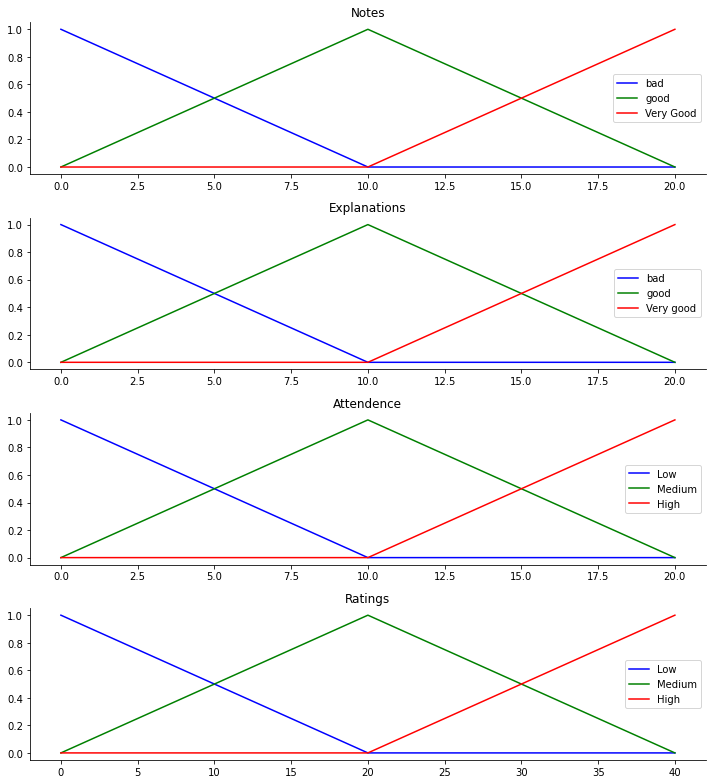

In [6]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(10,11))

ax0.plot(x_class_notes, class_notes_bad, 'b', label='bad')
ax0.plot(x_class_notes, class_notes_good, 'g', label='good')
ax0.plot(x_class_notes, class_notes_vgood, 'r', label='Very Good')
ax0.set_title('Notes')
ax0.legend()

ax1.plot(x_exp, exp_bad, 'b', linewidth=1.5, label='bad')
ax1.plot(x_exp, exp_good, 'g', linewidth=1.5, label='good')
ax1.plot(x_exp, exp_vgood, 'r', linewidth=1.5, label= 'Very good')
ax1.set_title('Explanations')
ax1.legend()



ax2.plot(x_atten, atten_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_atten, atten_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_atten, atten_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Attendence')
ax2.legend()

ax3.plot(x_ratings, ratings_lo, 'b', linewidth=1.5, label='Low')
ax3.plot(x_ratings, ratings_md, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_ratings, ratings_hi, 'r', linewidth=1.5, label='High')
ax3.set_title('Ratings')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2,ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

###  Finding the Rank of Professor with Class Notes quality 9.5 , Explanation quality 15 and Attendence 6.5???

### Fuzzification: interp_membership function
Find the degree of membership u(xx) for a given value of x = xx.
We need the activation of our fuzzy membership functions at these values.

In [7]:
class_notes_level_bad = fuzz.interp_membership(x_class_notes, class_notes_bad, 9.5)
class_notes_level_good = fuzz.interp_membership(x_class_notes, class_notes_good, 9.5)
class_notes_level_vgood = fuzz.interp_membership(x_class_notes, class_notes_vgood, 9.5)
print(class_notes_level_bad, class_notes_level_good, class_notes_level_vgood)

0.05 0.95 0.0


In [8]:
exp_level_bad = fuzz.interp_membership(x_exp, exp_bad, 15)
exp_level_good = fuzz.interp_membership(x_exp, exp_good, 15)
exp_level_vgood = fuzz.interp_membership(x_exp, exp_vgood, 15)
print(exp_level_bad, exp_level_good, exp_level_vgood)

0.0 0.5 0.5


In [9]:
atten_level_lo = fuzz.interp_membership(x_atten, atten_lo, 6.5)
atten_level_md = fuzz.interp_membership(x_atten, atten_md, 6.5)
atten_level_hi = fuzz.interp_membership(x_atten, atten_hi, 6.5)
print(atten_level_lo, atten_level_md, atten_level_hi)

0.35 0.6499999999999999 0.0


### Rule Evaluation

If the Class Notes is worst OR the Explanations is bad or Attendence is low, then the ratings will be low

In [10]:
import math 

active_rule1 = np.fmax(class_notes_level_bad,exp_level_bad) # fuzzy-max = Boolean OR
print('active_rule1', active_rule1)
active_rule_one = np.fmax(active_rule1,atten_level_lo)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
ratings_lo = np.fmin(active_rule_one, ratings_lo)  # fuzzy-min = Boolean AND
print(ratings_lo)

active_rule1 0.05
[0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35
 0.3  0.25 0.2  0.15 0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


If the Class Notes is good OR the Explanations is good and Attendence is medium, then the ratings will be Medium


In [11]:
active_rule2 = np.fmax(class_notes_level_good,exp_level_good) # fuzzy-max = Boolean OR
print('active_rule2', active_rule2)

active_rule_two = np.fmax(active_rule2,atten_level_md)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
ratings_md = np.fmin(active_rule_two, ratings_md)  # fuzzy-min = Boolean AND
print(ratings_md)


active_rule2 0.95
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 0.95 0.95 0.9  0.85 0.8  0.75 0.7  0.65
 0.6  0.55 0.5  0.45 0.4  0.35 0.3  0.25 0.2  0.15 0.1  0.05 0.  ]


If the Class Notes is very good OR the Explanations is very good and Attendence is high, then the ratings will be high

In [12]:
active_rule3 = np.fmax(class_notes_level_vgood,exp_level_vgood) # fuzzy-max = Boolean OR
print('active_rule3', active_rule3)

active_rule_three = np.fmax(active_rule3,atten_level_hi)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
ratings_hi = np.fmin(active_rule_three, ratings_hi)  # fuzzy-min = Boolean AND
print(ratings_hi)


active_rule3 0.5
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35
 0.4  0.45 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]


### Composition

In [22]:
#Finding the aggregation
aggregated = np.fmax(ratings_lo, np.fmax(ratings_md, ratings_hi))
print(aggregated)

[0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 0.95 0.95 0.9  0.85 0.8  0.75 0.7  0.65
 0.6  0.55 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]


### Defuzzification

In [14]:
#calculating result using centroid theory
rating = fuzz.defuzz(x_ratings, aggregated, 'centroid')
print(rating)

20.84582893347413


### For the  Class Notes quality 9.5 , Explanation quality 15 and Attendence 6.5 values our rating for the professor is 20.84 

### Plot The Output

In [15]:
rating_activation = fuzz.interp_membership(x_ratings, aggregated, rating)  # for plot
rating_activation

0.95

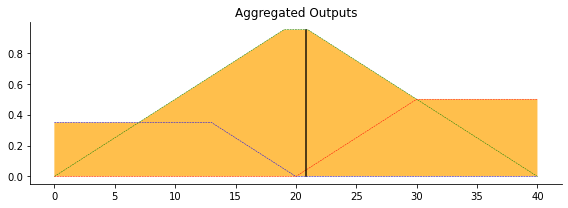

In [21]:
ratings0 = np.zeros_like(x_ratings)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_ratings, ratings_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_ratings, ratings_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_ratings, ratings_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_ratings, ratings0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([rating, rating], [0, rating_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Outputs')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()